# EDA tomás

---

In [107]:
# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Data management libraries
import numpy as np
import pandas as pd

# Machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn import set_config
set_config(display='diagram')

# Others
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mltools import model_tools as MT

---

## 1. Preparing the Dataset

### STEP 1: IMPORT DATASET

In [108]:
df_IRRAD = pd.read_csv('data/G04A_DATOS_IRRAD.csv', sep = ",")
df_IRRAD.head()

,FECHA,IRRADH00,IRRADH03,IRRADH06,IRRADH09,IRRADH12,IRRADH15,IRRADH18,IRRADH21,ANNO,MES,DIA,DIASEM
0,2015-01-01,0.0,0.0,0.0,589813.00,1294089.50,468098.47,0.0,0.0,2015,1,1,3
1,2015-01-02,0.0,0.0,0.0,438244.75,989406.00,272884.66,0.0,0.0,2015,1,2,4
2,2015-01-03,0.0,0.0,0.0,543215.75,1162550.80,359685.12,0.0,0.0,2015,1,3,5
3,2015-01-04,0.0,0.0,0.0,504131.56,1229353.20,460497.50,0.0,0.0,2015,1,4,6
4,2015-01-05,0.0,0.0,0.0,502349.70,1012553.75,391783.16,0.0,0.0,2015,1,5,0


In [109]:
df_UTIL = pd.read_csv('data/G04A_DATOS_UTIL.csv', sep = ",")
df_UTIL.head()

,FECHA,UTILH00,UTILH03,UTILH06,UTILH09,UTILH12,UTILH15,UTILH18,UTILH21,ANNO,MES,DIA,DIASEM
0,2015-01-01,0.000023,0.000008,0.053105,0.590946,0.615057,0.091254,0.000008,0.000019,2015,1,1,3
1,2015-01-02,0.000012,0.000004,0.048031,0.397291,0.396714,0.048448,0.000000,0.000008,2015,1,2,4
2,2015-01-03,0.000008,0.000000,0.049542,0.557435,0.604719,0.091748,0.000004,0.000004,2015,1,3,5
3,2015-01-04,0.000008,0.000000,0.014918,0.375060,0.547907,0.090296,0.000016,0.000023,2015,1,4,6
4,2015-01-05,0.000008,0.000008,0.016370,0.167025,0.246309,0.051614,0.000004,0.000000,2015,1,5,0


We join everything in the same dataframe using merge

In [110]:
df_aux = pd.merge(df_IRRAD, df_UTIL, on='FECHA')

In [111]:
df_aux

,FECHA,IRRADH00,IRRADH03,IRRADH06,IRRADH09,IRRADH12,IRRADH15,IRRADH18,IRRADH21,ANNO_x,...,UTILH06,UTILH09,UTILH12,UTILH15,UTILH18,UTILH21,ANNO_y,MES_y,DIA_y,DIASEM_y
0,2015-01-01,0.0,0.0,0.0,589813.00,1294089.50,468098.470,0.0,0.0,2015,...,0.053105,0.590946,0.615057,0.091254,0.000008,0.000019,2015,1,1,3
1,2015-01-02,0.0,0.0,0.0,438244.75,989406.00,272884.660,0.0,0.0,2015,...,0.048031,0.397291,0.396714,0.048448,0.000000,0.000008,2015,1,2,4
2,2015-01-03,0.0,0.0,0.0,543215.75,1162550.80,359685.120,0.0,0.0,2015,...,0.049542,0.557435,0.604719,0.091748,0.000004,0.000004,2015,1,3,5
3,2015-01-04,0.0,0.0,0.0,504131.56,1229353.20,460497.500,0.0,0.0,2015,...,0.014918,0.375060,0.547907,0.090296,0.000016,0.000023,2015,1,4,6
4,2015-01-05,0.0,0.0,0.0,502349.70,1012553.75,391783.160,0.0,0.0,2015,...,0.016370,0.167025,0.246309,0.051614,0.000004,0.000000,2015,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,2020-12-27,0.0,0.0,0.0,176437.95,596362.94,213554.200,0.0,0.0,2020,...,0.012102,0.068252,0.070849,0.012841,0.000003,0.000003,2020,12,27,6
2188,2020-12-28,0.0,0.0,0.0,573497.50,1097877.50,269206.560,0.0,0.0,2020,...,0.032334,0.334919,0.285503,0.046018,0.000003,0.000007,2020,12,28,0
2189,2020-12-29,0.0,0.0,0.0,425860.56,801252.40,237152.560,0.0,0.0,2020,...,0.023633,0.245105,0.282372,0.017419,0.000007,0.000007,2020,12,29,1
2190,2020-12-30,0.0,0.0,0.0,214860.45,321715.56,29951.986,0.0,0.0,2020,...,0.010654,0.134742,0.076885,0.005577,0.000010,0.000000,2020,12,30,2


We make the melt

In [112]:
id_vars = ['FECHA', 'ANNO_x', 'MES_x', 'DIA_x', 'DIASEM_x']

irrad_melt = pd.melt(df_aux, id_vars=id_vars, value_vars=['IRRADH00', 'IRRADH03', 'IRRADH06', 'IRRADH09', 'IRRADH12', 'IRRADH15', 'IRRADH18', 'IRRADH21'], var_name='HOUR', value_name='IRRAD_VALUE')

util_melt = pd.melt(df_aux, id_vars=id_vars, value_vars=['UTILH00', 'UTILH03', 'UTILH06', 'UTILH09', 'UTILH12', 'UTILH15', 'UTILH18', 'UTILH21'], var_name='HOUR', value_name='UTIL_VALUE')

irrad_melt['HOUR'] = irrad_melt['HOUR'].str.extract('(\d+)')
util_melt['HOUR'] = util_melt['HOUR'].str.extract('(\d+)')

df = pd.merge(irrad_melt, util_melt, on=id_vars + ['HOUR'])

In [113]:
df

,FECHA,ANNO_x,MES_x,DIA_x,DIASEM_x,HOUR,IRRAD_VALUE,UTIL_VALUE
0,2015-01-01,2015,1,1,3,00,0.0,0.000023
1,2015-01-02,2015,1,2,4,00,0.0,0.000012
2,2015-01-03,2015,1,3,5,00,0.0,0.000008
3,2015-01-04,2015,1,4,6,00,0.0,0.000008
4,2015-01-05,2015,1,5,0,00,0.0,0.000008
...,...,...,...,...,...,...,...,...
17531,2020-12-27,2020,12,27,6,21,0.0,0.000003
17532,2020-12-28,2020,12,28,0,21,0.0,0.000007
17533,2020-12-29,2020,12,29,1,21,0.0,0.000007
17534,2020-12-30,2020,12,30,2,21,0.0,0.000000


The IRRAD_VALUE column reflects the net irradiation absorbed by the Earth's surface, while UTIL_VALUE provides a measure of how much energy is being harnessed at each specific moment from the installed photovoltaic solar energy capacity.


We check if there is an annual periodicity. To do this, we will make a distinction between hours, since there is great variability in utility over time depending on whether it is one hour or another, as a consequence of the hours of sunshine.

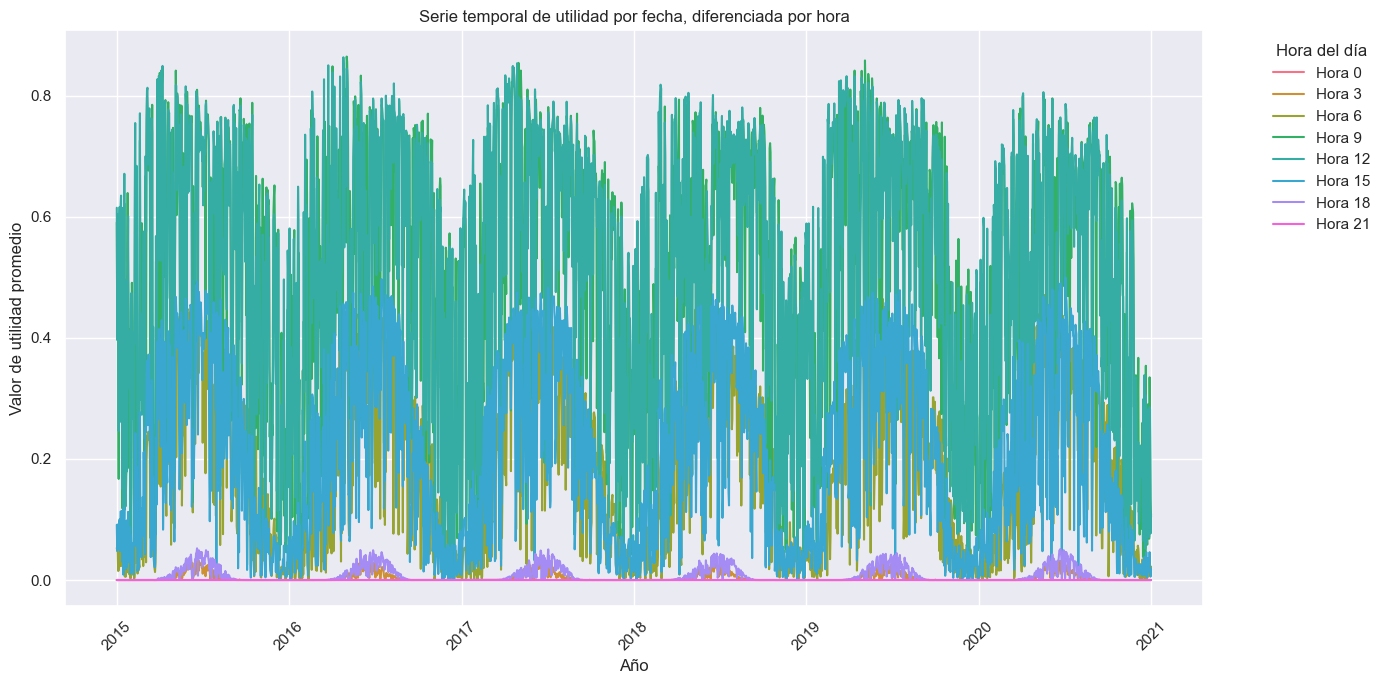

In [101]:
df['FECHA'] = pd.to_datetime(df['FECHA'])

df['HOUR'] = df['HOUR'].astype(int)

df_grouped = df.groupby([df['FECHA'].dt.date, 'HOUR'])['UTIL_VALUE'].mean().unstack()

plt.figure(figsize=(14, 7))

colors = sns.color_palette('husl', n_colors=df['HOUR'].nunique())

for hour, color in zip(df_grouped.columns, colors):
    plt.plot(df_grouped.index, df_grouped[hour], label=f'Hora {hour}', color=color)

plt.xlabel('Año')
plt.ylabel('Valor de utilidad promedio')
plt.title('Serie temporal de utilidad por fecha, diferenciada por hora')
plt.legend(title='Hora del día', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


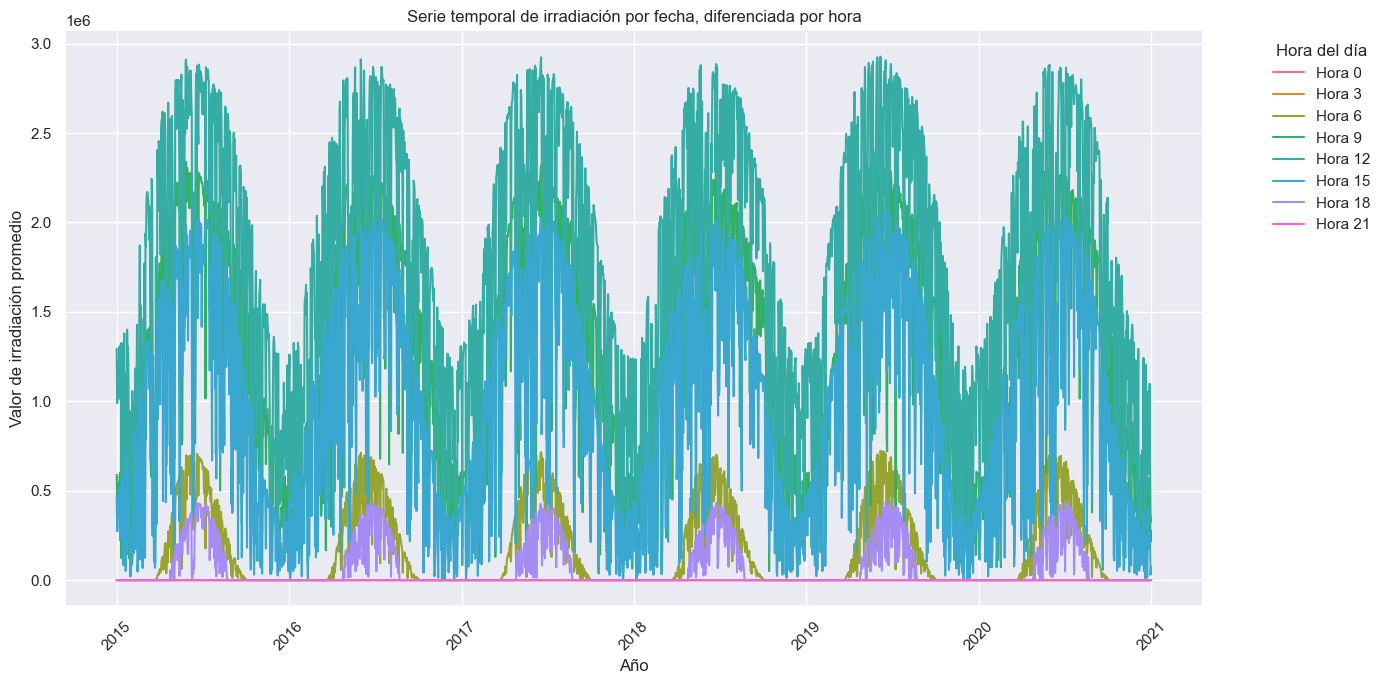

In [115]:
df['FECHA'] = pd.to_datetime(df['FECHA'])

df['HOUR'] = df['HOUR'].astype(int)

df_grouped = df.groupby([df['FECHA'].dt.date, 'HOUR'])['IRRAD_VALUE'].mean().unstack()

plt.figure(figsize=(14, 7))

colors = sns.color_palette('husl', n_colors=df['HOUR'].nunique())

for hour, color in zip(df_grouped.columns, colors):
    plt.plot(df_grouped.index, df_grouped[hour], label=f'Hora {hour}', color=color)

plt.xlabel('Año')
plt.ylabel('Valor de irradiación promedio')
plt.title('Serie temporal de irradiación por fecha, diferenciada por hora')
plt.legend(title='Hora del día', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


It can be seen that the trend between these two variables is very similar. This is logical, since if during that time of day the area is more exposed to the sun's irradiation, the photovoltaic panels will be able to use their capacity more, since more rays reach them and therefore they will be able to carry out greater conversion into electricity.

Now let's look in more detail at what times of day these utility peaks are reached, on average throughout the year. These hours may vary slightly as the year goes by, but in essence and on average they will remain within a narrow range. That is why we can make the following graph.

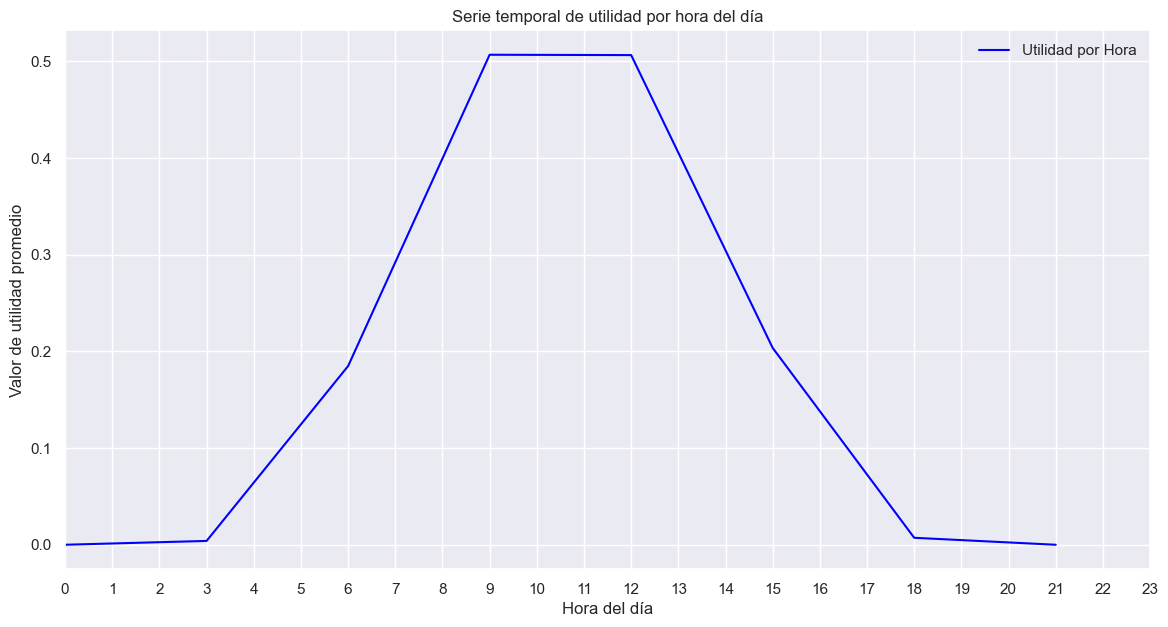

In [103]:
df['FECHA'] = pd.to_datetime(df['ANNO_x'].astype(str) + '-' + df['MES_x'].astype(str) + '-' + df['DIA_x'].astype(str) + ' ' + df['HOUR'].astype(str) + ':00')
df.set_index('FECHA', inplace=True)

df_grouped_by_hour = df.groupby(df.index.hour).mean()

plt.figure(figsize=(14, 7))
plt.plot(df_grouped_by_hour.index, df_grouped_by_hour['UTIL_VALUE'], label='Utilidad por Hora', color='blue')
plt.xlabel('Hora del día')
plt.ylabel('Valor de utilidad promedio')
plt.title('Serie temporal de utilidad por hora del día')
plt.legend()
plt.grid(True)
plt.xticks(range(24))  
plt.xlim(0, 23)  

plt.show()


In [79]:
df.reset_index(drop=False, inplace=True)
df

,FECHA,ANNO_x,MES_x,DIA_x,DIASEM_x,HOUR,IRRAD_VALUE,UTIL_VALUE
0,2015-01-01 00:00:00,2015,1,1,3,0,0.0,0.000023
1,2015-01-02 00:00:00,2015,1,2,4,0,0.0,0.000012
2,2015-01-03 00:00:00,2015,1,3,5,0,0.0,0.000008
3,2015-01-04 00:00:00,2015,1,4,6,0,0.0,0.000008
4,2015-01-05 00:00:00,2015,1,5,0,0,0.0,0.000008
...,...,...,...,...,...,...,...,...
17531,2020-12-27 21:00:00,2020,12,27,6,21,0.0,0.000003
17532,2020-12-28 21:00:00,2020,12,28,0,21,0.0,0.000007
17533,2020-12-29 21:00:00,2020,12,29,1,21,0.0,0.000007
17534,2020-12-30 21:00:00,2020,12,30,2,21,0.0,0.000000


The day of the week is a variable that will not take any relevance when predicting the utility, so we proceed to delete it

In [80]:
df = df.drop(['DIASEM_x'], axis=1)

In [81]:
df

,FECHA,ANNO_x,MES_x,DIA_x,HOUR,IRRAD_VALUE,UTIL_VALUE
0,2015-01-01 00:00:00,2015,1,1,0,0.0,0.000023
1,2015-01-02 00:00:00,2015,1,2,0,0.0,0.000012
2,2015-01-03 00:00:00,2015,1,3,0,0.0,0.000008
3,2015-01-04 00:00:00,2015,1,4,0,0.0,0.000008
4,2015-01-05 00:00:00,2015,1,5,0,0.0,0.000008
...,...,...,...,...,...,...,...
17531,2020-12-27 21:00:00,2020,12,27,21,0.0,0.000003
17532,2020-12-28 21:00:00,2020,12,28,21,0.0,0.000007
17533,2020-12-29 21:00:00,2020,12,29,21,0.0,0.000007
17534,2020-12-30 21:00:00,2020,12,30,21,0.0,0.000000


In [82]:
df['FECHA'] = pd.to_datetime(df['FECHA'])
df['dia_mes'] = df['FECHA'].dt.dayofyear
print(df)

                    FECHA  ANNO_x  MES_x  DIA_x  HOUR  IRRAD_VALUE  \
0     2015-01-01 00:00:00    2015      1      1     0          0.0   
1     2015-01-02 00:00:00    2015      1      2     0          0.0   
2     2015-01-03 00:00:00    2015      1      3     0          0.0   
3     2015-01-04 00:00:00    2015      1      4     0          0.0   
4     2015-01-05 00:00:00    2015      1      5     0          0.0   
...                   ...     ...    ...    ...   ...          ...   
17531 2020-12-27 21:00:00    2020     12     27    21          0.0   
17532 2020-12-28 21:00:00    2020     12     28    21          0.0   
17533 2020-12-29 21:00:00    2020     12     29    21          0.0   
17534 2020-12-30 21:00:00    2020     12     30    21          0.0   
17535 2020-12-31 21:00:00    2020     12     31    21          0.0   

       UTIL_VALUE  dia_mes  
0        0.000023        1  
1        0.000012        2  
2        0.000008        3  
3        0.000008        4  
4        0.000

In [83]:
df = df.drop(['FECHA'], axis=1)
df

,ANNO_x,MES_x,DIA_x,HOUR,IRRAD_VALUE,UTIL_VALUE,dia_mes
0,2015,1,1,0,0.0,0.000023,1
1,2015,1,2,0,0.0,0.000012,2
2,2015,1,3,0,0.0,0.000008,3
3,2015,1,4,0,0.0,0.000008,4
4,2015,1,5,0,0.0,0.000008,5
...,...,...,...,...,...,...,...
17531,2020,12,27,21,0.0,0.000003,362
17532,2020,12,28,21,0.0,0.000007,363
17533,2020,12,29,21,0.0,0.000007,364
17534,2020,12,30,21,0.0,0.000000,365


In [84]:
df 

,ANNO_x,MES_x,DIA_x,HOUR,IRRAD_VALUE,UTIL_VALUE,dia_mes
0,2015,1,1,0,0.0,0.000023,1
1,2015,1,2,0,0.0,0.000012,2
2,2015,1,3,0,0.0,0.000008,3
3,2015,1,4,0,0.0,0.000008,4
4,2015,1,5,0,0.0,0.000008,5
...,...,...,...,...,...,...,...
17531,2020,12,27,21,0.0,0.000003,362
17532,2020,12,28,21,0.0,0.000007,363
17533,2020,12,29,21,0.0,0.000007,364
17534,2020,12,30,21,0.0,0.000000,365


In [85]:
#df.to_excel("prueba_2.xlsx", index=False, engine='openpyxl')

We join the data with a groupby based on the months by averaging, so we can see the progress throughout the months of the year. This allows us to have a global average view of the data

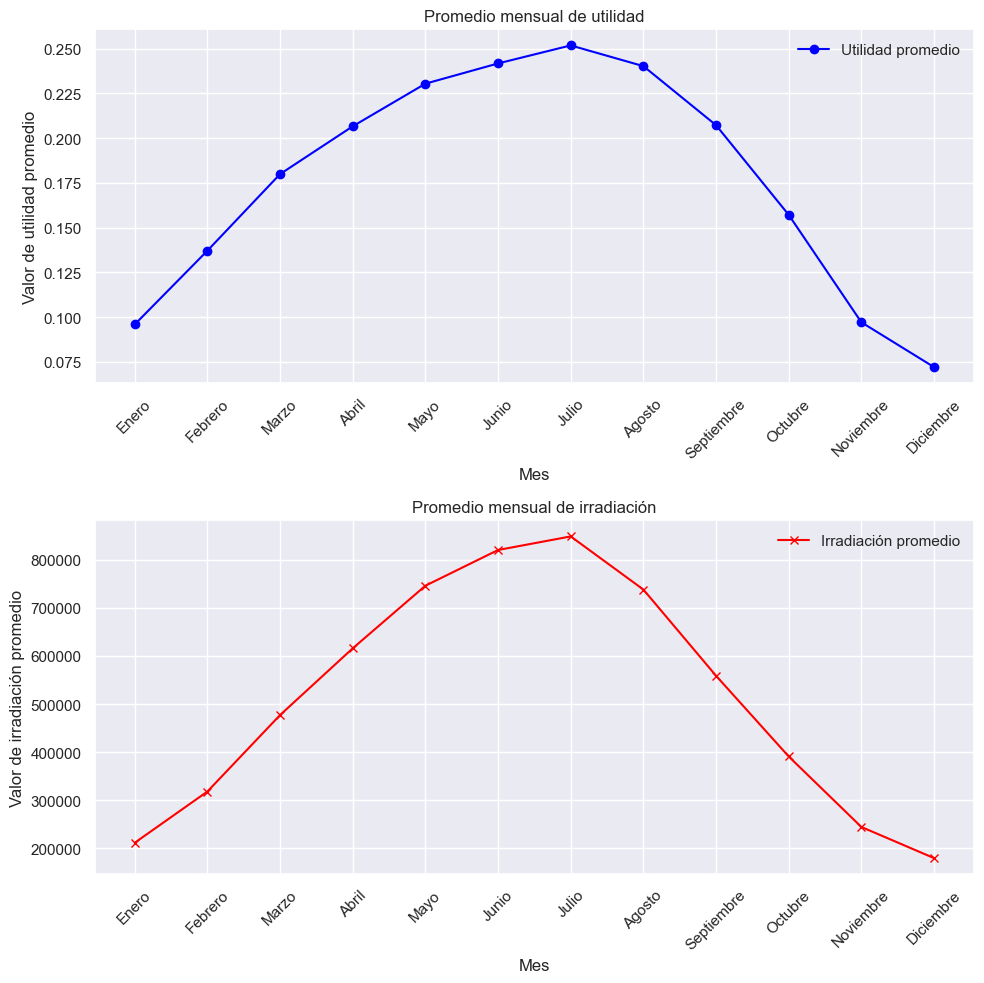

In [104]:
monthly_avg_util = df.groupby('MES_x')['UTIL_VALUE'].mean()
monthly_avg_irrad = df.groupby('MES_x')['IRRAD_VALUE'].mean()

fig, axs = plt.subplots(2, 1, figsize=(10, 10))  

axs[0].plot(monthly_avg_util.index, monthly_avg_util.values, label='Utilidad promedio', color='blue', marker='o')
axs[0].set_title('Promedio mensual de utilidad')
axs[0].set_xlabel('Mes')
axs[0].set_ylabel('Valor de utilidad promedio')
axs[0].set_xticks(range(1, 13))
axs[0].set_xticklabels(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
axs[0].legend()
axs[0].grid(True)

axs[1].plot(monthly_avg_irrad.index, monthly_avg_irrad.values, label='Irradiación promedio', color='red', marker='x')
axs[1].set_title('Promedio mensual de irradiación')
axs[1].set_xlabel('Mes')
axs[1].set_ylabel('Valor de irradiación promedio')
axs[1].set_xticks(range(1, 13))
axs[1].set_xticklabels(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()

plt.show()


You can see how the peak is reached between June and July, which, in Spain, makes great sense.

Let's now break down the data by year, to see if there is a year that is more relevant than another or if there is a lot of discrepancy between these


/var/folders/1h/jqj_w51j5yb0xd88lvfrg2kw0000gn/T/ipykernel_38424/1071369209.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


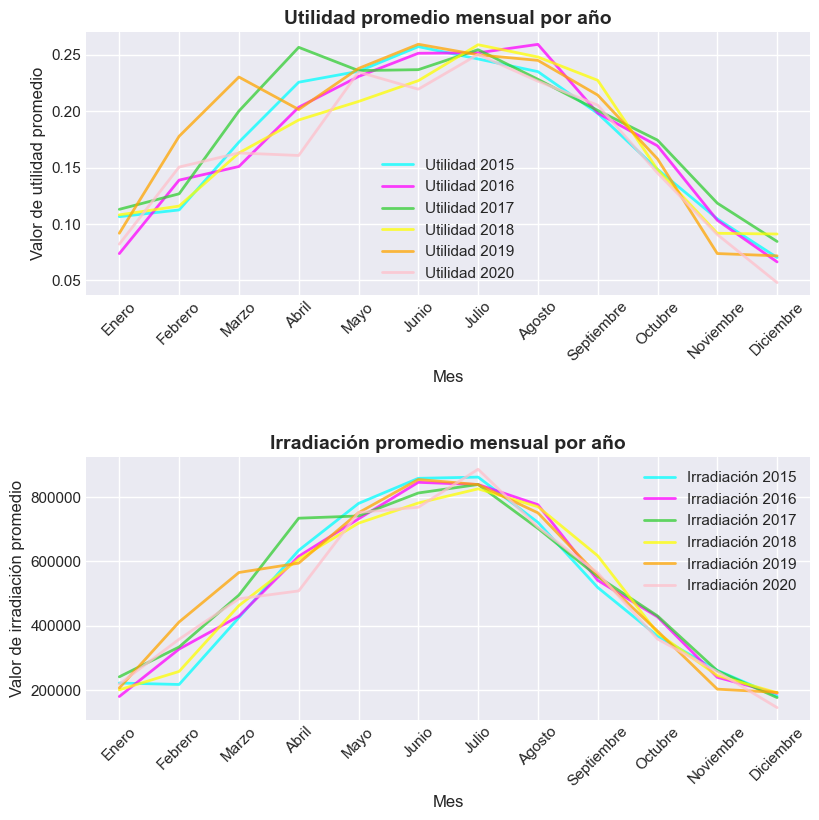

In [105]:

plt.style.use('seaborn-darkgrid')  

fig, axs = plt.subplots(2, 1, figsize=(9, 9))  

colores = ['cyan', 'magenta', 'limegreen', 'yellow', 'orange', 'pink', 'white', 'lightblue', 'lightgreen', 'lavender']

nombres_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

años = df['ANNO_x'].unique()

for i, año in enumerate(años):
    color = colores[i % len(colores)] 

    
    df_año = df[df['ANNO_x'] == año]
    monthly_avg_util = df_año.groupby('MES_x')['UTIL_VALUE'].mean()
    monthly_avg_irrad = df_año.groupby('MES_x')['IRRAD_VALUE'].mean()

    
    axs[0].plot(monthly_avg_util.index, monthly_avg_util.values, label=f'Utilidad {año}', color=color, linestyle='-', linewidth=2, alpha=0.75)
    
    
    axs[1].plot(monthly_avg_irrad.index, monthly_avg_irrad.values, label=f'Irradiación {año}', color=color, linestyle='-', linewidth=2, alpha=0.75)

axs[0].set_title('Utilidad promedio mensual por año', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Mes', fontsize=12)
axs[0].set_ylabel('Valor de utilidad promedio', fontsize=12)
axs[0].set_xticks(range(1, 13))
axs[0].set_xticklabels(nombres_meses, rotation=45)
axs[0].legend()

axs[1].set_title('Irradiación promedio mensual por año', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Mes', fontsize=12)
axs[1].set_ylabel('Valor de irradiación promedio', fontsize=12)
axs[1].set_xticks(range(1, 13))
axs[1].set_xticklabels(nombres_meses, rotation=45)
axs[1].legend()

plt.tight_layout(pad=3.0)
plt.show()


It can be seen how the value of the average utility varies significantly in the month of April for the years 2020 and 2017. There is also a discrepancy between the years 2019 and 2016 for the month of March.

It is clear that according to the graphs there is a high linear correlation between useful and irrad. Let's quantitatively measure this fact. For this we will use the Pearson correlation coefficient (r)

In [88]:
valor_correlacion = df['IRRAD_VALUE'].corr(df['UTIL_VALUE'])
print("Correlación entre IRRAD_VALUE y UTIL_VALUE:", valor_correlacion)

Correlación entre IRRAD_VALUE y UTIL_VALUE: 0.9022319970702551


### STEP 2: CHECK OUT THE MISSING VALUES

In [89]:
### Info and type of variables & missing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ANNO_x       17536 non-null  int64  
 1   MES_x        17536 non-null  int64  
 2   DIA_x        17536 non-null  int64  
 3   HOUR         17536 non-null  int64  
 4   IRRAD_VALUE  17536 non-null  float64
 5   UTIL_VALUE   17536 non-null  float64
 6   dia_mes      17536 non-null  int32  
dtypes: float64(2), int32(1), int64(4)
memory usage: 890.6 KB


In [90]:
df['HOUR'] = pd.to_numeric(df['HOUR'], errors='coerce')

There is no any null value

### STEP 3: PLOT THE DATA AND CHECK OUT FOR OUTLIERS

In [91]:
# Data types
df.describe()

,ANNO_x,MES_x,DIA_x,HOUR,IRRAD_VALUE,UTIL_VALUE,dia_mes
count,17536.000000,17536.000000,17536.000000,17536.00000,1.753600e+04,17536.000000,17536.000000
mean,2017.500456,6.521898,15.732664,10.50000,5.132890e+05,0.176620,183.166971
std,1.708230,3.449085,8.801621,6.87406,7.695626e+05,0.244970,105.465788
min,2015.000000,1.000000,1.000000,0.00000,0.000000e+00,-0.000169,1.000000
25%,2016.000000,4.000000,8.000000,5.25000,0.000000e+00,0.000008,92.000000
50%,2017.500000,7.000000,16.000000,10.50000,0.000000e+00,0.019769,183.000000
75%,2019.000000,10.000000,23.000000,15.75000,8.401422e+05,0.325520,274.250000
max,2020.000000,12.000000,31.000000,21.00000,2.927716e+06,0.864839,366.000000


An interesting fact that can be extracted is that during all the years, on an annual average, 17% of the energy generated by photovoltaic systems has been recorded. A high average utility value would indicate high efficiency and energy production of the solar installations, which is expected during the sunnier months. Spain enjoys excellent solar irradiation, making it one of the best places in Europe for solar energy. Thanks to its geographical position, it enjoys high levels of sunlight throughout the year and therefore has significant potential for the development of solar energy, both photovoltaic and solar thermal. However, the plates are capable of generating 17%. In countries further from the equator, this should be significantly reduced

### STEP 4: ENCODE CATEGORICAL VARIABLES

In [92]:
#There are no categorical input variables

### Convert output variable to factor
#df.Y = df.Y.astype('category')
#df.info()

### STEP 5: EXPLORATORY ANALYSIS
Correlation plot of numeric variables

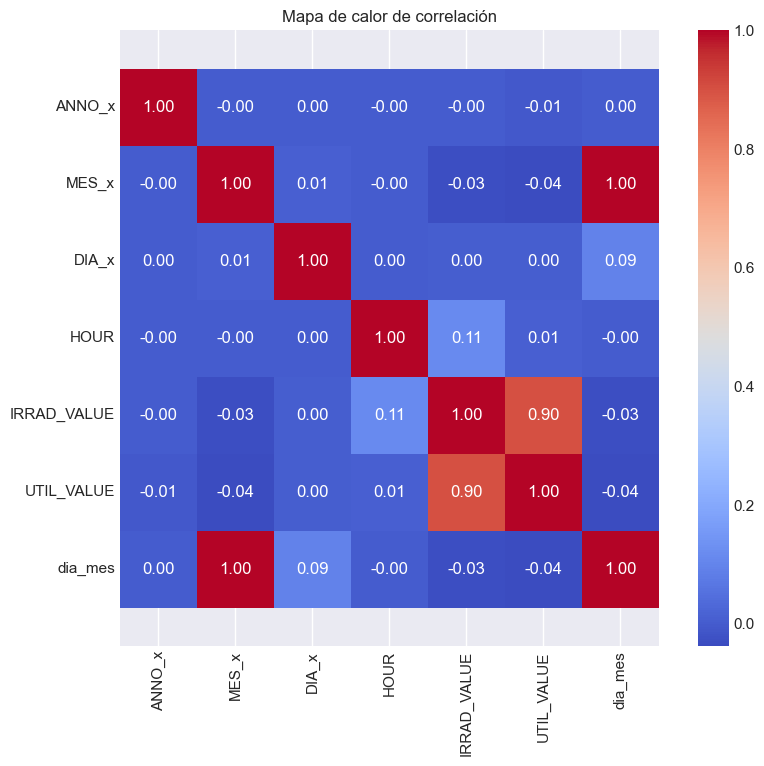

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.ylim(len(corr)+0.5, -0.5)

plt.title('Mapa de calor de correlación')
plt.show()


### Histograms for numerical variables

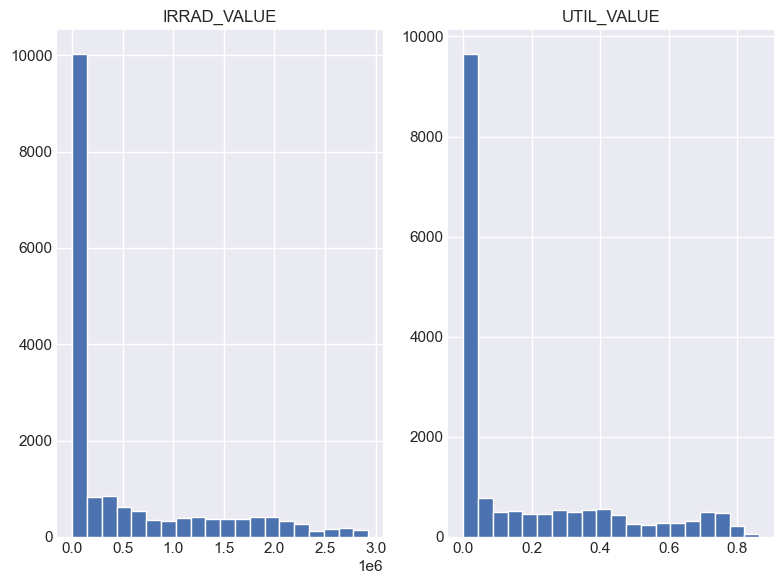

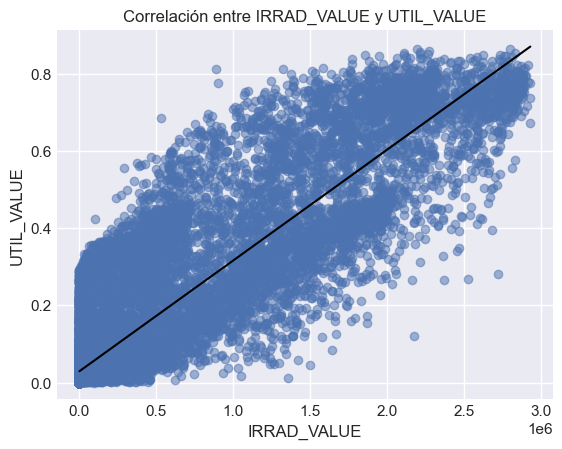

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

df[['IRRAD_VALUE', 'UTIL_VALUE']].hist(figsize=(8, 6), bins=20)
plt.tight_layout() 
plt.show()

plt.scatter(df['IRRAD_VALUE'], df['UTIL_VALUE'], alpha=0.5) 

coeficientes = np.polyfit(df['IRRAD_VALUE'], df['UTIL_VALUE'], 1) 
polinomio = np.poly1d(coeficientes) 
valores_x = np.linspace(df['IRRAD_VALUE'].min(), df['IRRAD_VALUE'].max(), 100) 
valores_y = polinomio(valores_x) 
plt.plot(valores_x, valores_y, color="black") 

plt.title('Correlación entre IRRAD_VALUE y UTIL_VALUE') 
plt.xlabel('IRRAD_VALUE') 
plt.ylabel('UTIL_VALUE') 
plt.grid(True) 
plt.show() 


### Boxplots to detect outliers

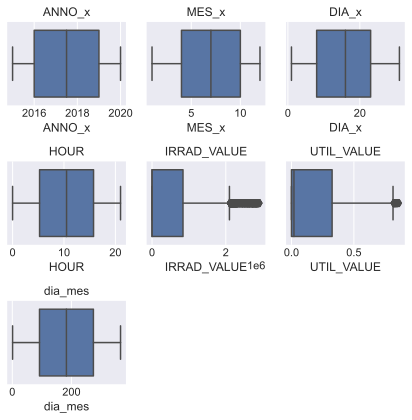

In [36]:
num_cols = df.select_dtypes(include=np.number).columns
num_cols_count = len(num_cols)

ncols = 3  
nrows = int(np.ceil(num_cols_count / ncols))  

plt.figure(figsize=(ncols * 2, nrows * 2))  

for i, col in enumerate(num_cols):
    plt.subplot(nrows, ncols, i + 1)  
    sns.boxplot(x=col, data=df)
    plt.title(f"{col}")

plt.tight_layout()
plt.show()


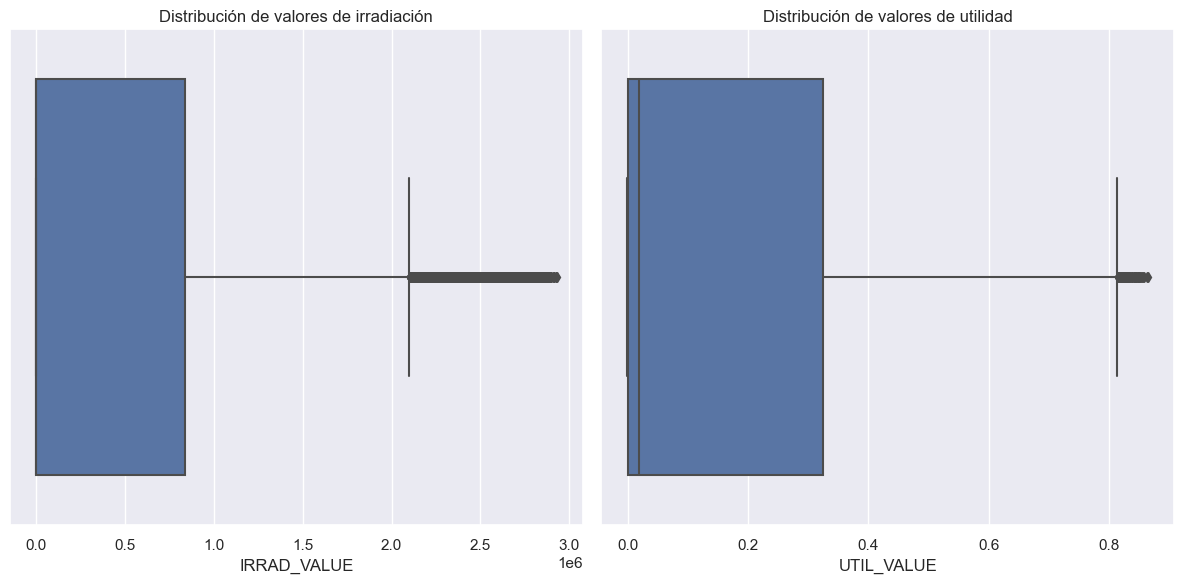

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando un área de gráficos con 1 fila y 2 columnas
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Gráfico para IRRAD_VALUE
sns.boxplot(x=df['IRRAD_VALUE'], ax=axs[0])  # Nota el uso de ax=axs[0] para especificar la posición del subplot
axs[0].set_title('Distribución de valores de irradiación')  # Título para el primer gráfico

# Gráfico para UTIL_VALUE
sns.boxplot(x=df['UTIL_VALUE'], ax=axs[1])  # Nota el uso de ax=axs[1] para especificar la posición del subplot
axs[1].set_title('Distribución de valores de utilidad')  # Título para el segundo gráfico

plt.tight_layout()  # Ajusta automáticamente los subplots para que se ajusten al área de dibujo
plt.show()



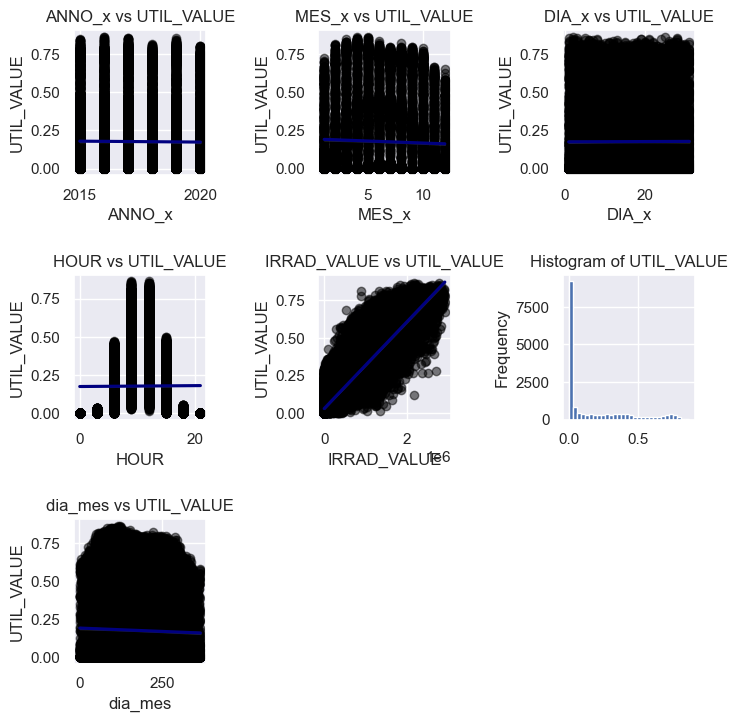

In [62]:
MT.PlotDataframe(df, 'UTIL_VALUE',figsize=[8,8])
